<a href="https://colab.research.google.com/github/mpindaro/animal-crossing-analysis/blob/master/Animal_Crossing_Villagers_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np



In [ ]:

villagers = pd.read_csv("villagers.csv")
villagers.head(5)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


# Analisi descrittiva

##Analisi Monovariata

###Species
Categorico

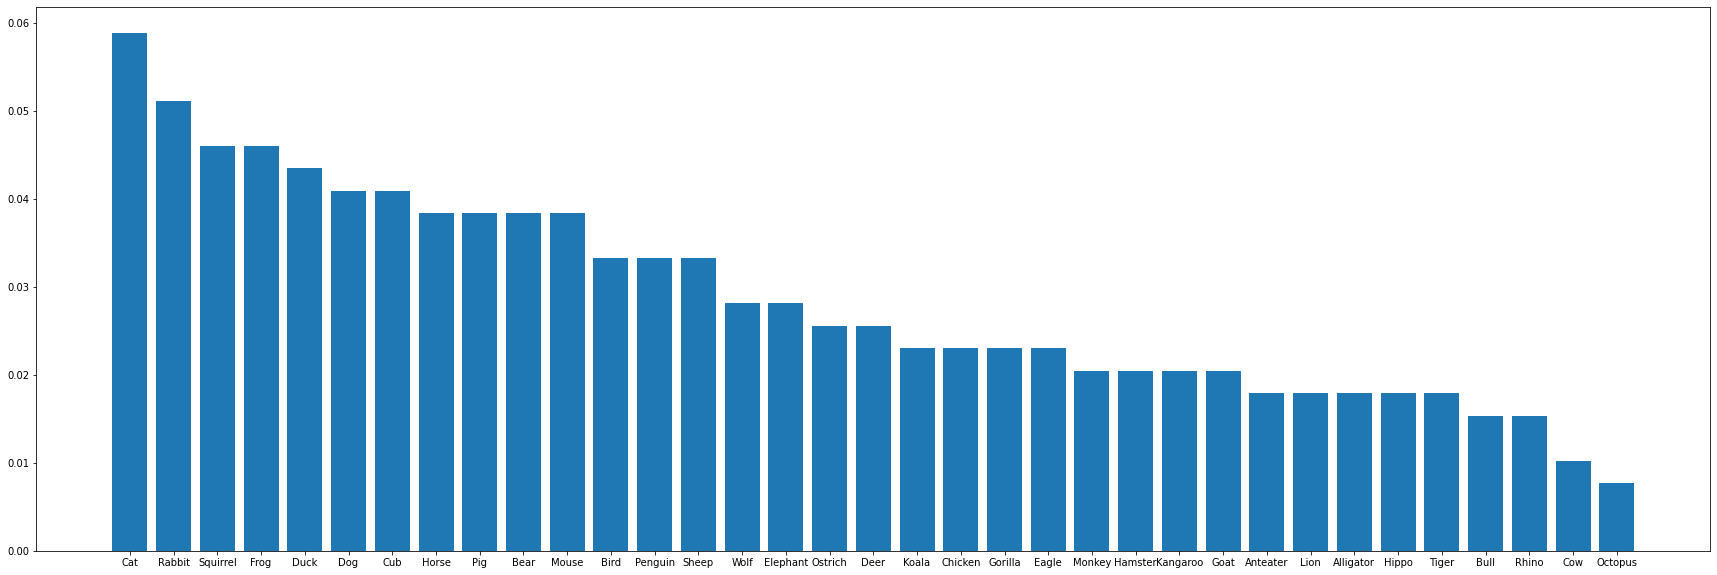

In [ ]:
species = villagers['Species']
species_freq = species.value_counts(normalize=True)
plt.figure(figsize=(30,10))
plt.bar(species_freq.index, species_freq.values)
plt.show()


In [ ]:
def gini_eterogeneity(series):
    return 1 - (sum(series.value_counts(normalize=True)
                    .map(lambda f: f**2)))

In [ ]:
gini_eterogeneity(species)

0.9663202098364088

### Personality

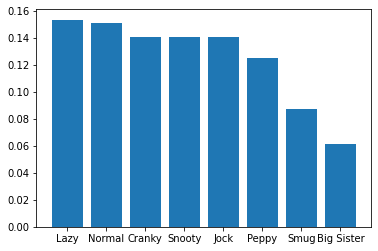

In [ ]:
personalities = villagers['Personality']
personalities_freq = personalities.value_counts(normalize=True)
#plt.figure(figsize=(30,10))
plt.bar(personalities_freq.index, personalities_freq.values)
plt.show()


In [ ]:
gini_eterogeneity(personalities)

0.8672889371471929

###Hobby

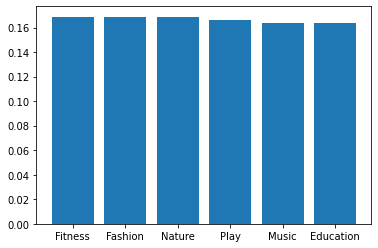

In [ ]:
hobbies = villagers['Hobby']
hobbies_freq = hobbies.value_counts(normalize=True)
#plt.figure(figsize=(30,10))
plt.bar(hobbies_freq.index, hobbies_freq.values)
plt.show()


In [ ]:
gini_eterogeneity(hobbies)

0.8333017183299429

Gli hobby sono una distribuzione uniforme => Animal crossing vuole massimizzare l'eterogeneità. Ma a noi non ci interessa: chi ha hobby simili sta bene insieme

###Favorite Song

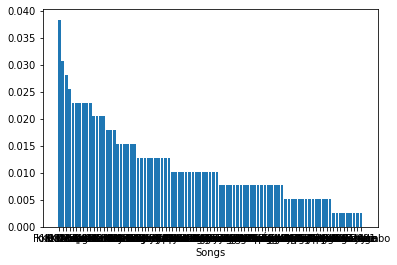

In [ ]:
songs = villagers['Favorite Song']
songs_freq = songs.value_counts(normalize=True)
#plt.figure(figsize=(30,10))

plt.bar(songs_freq.index, songs_freq.values)
plt.xlabel("Songs")
plt.show()



In [ ]:
gini_eterogeneity(songs)

0.984268810381931

##Analisi Bivariata

###Style



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


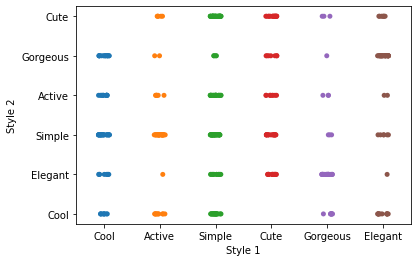

In [ ]:
style1 = villagers['Style 1']
style2 = villagers['Style 2']

sns.stripplot(style1, style2)

E' un bel grafichino. Mo cerchiamo di capire l'associazione

In [ ]:
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x,y)
  chi2 = ss.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
cramers_v(style1, style2)

0.2920472586900561

Pare esserci poca associazione

####Style 1

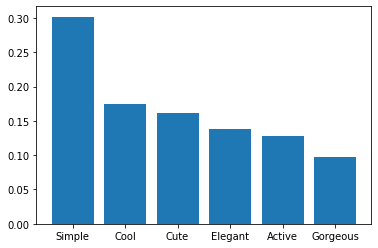

In [ ]:
style1_freq = style1.value_counts(normalize=True)
#plt.figure(figsize=(30,10))

plt.bar(style1_freq.index, style1_freq.values)
plt.show()


####Style 2

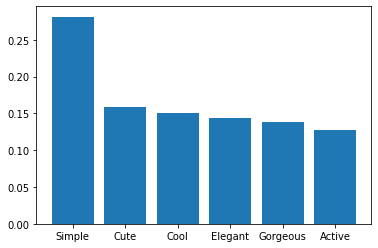

In [ ]:
style2_freq = style2.value_counts(normalize=True)
#plt.figure(figsize=(30,10))

plt.bar(style2_freq.index, style2_freq.values)
plt.show()


###Color

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


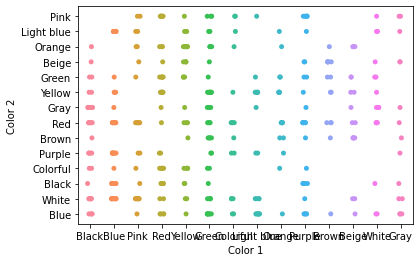

In [ ]:
color1 = villagers['Color 1']
color2 = villagers['Color 2']

sns.stripplot(color1, color2)

In [ ]:
cramers_v(color1, color2)

0.19940147541558065

####Color 1

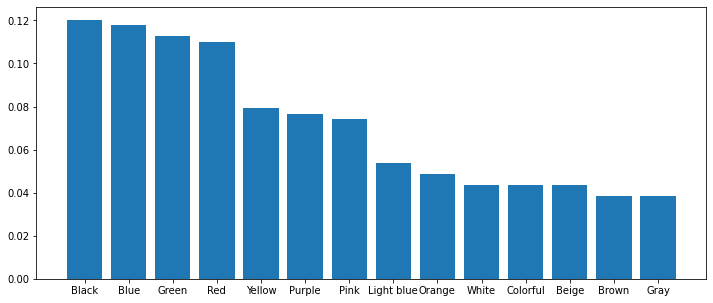

In [ ]:
color1_freq = color1.value_counts(normalize=True)
plt.figure(figsize=(12,5))
plt.bar(color1_freq.index, color1_freq.values)
plt.show()


####Color 2

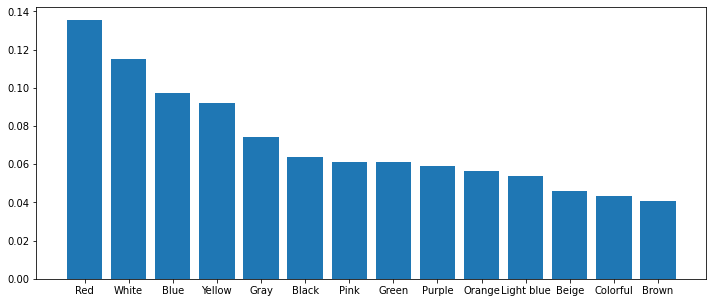

In [ ]:
color2_freq = color2.value_counts(normalize=True)
plt.figure(figsize=(12,5))
plt.bar(color2_freq.index, color2_freq.values)
plt.show()

##Analisi Multivariata

In [ ]:
features=["Species", "Personality",	"Hobby"	, "Favorite Song",	"Style 1",	"Style 2",	"Color 1" , 	"Color 2"]

for f1 in features:
  for f2 in features:
    print(f"{f1},{f2}: {cramers_v(villagers[f1],villagers[f2])}")

Species,Species: 0.9999999999999999
Species,Personality: 0.0
Species,Hobby: 0.19481495068552301
Species,Favorite Song: 0.13076974404569083
Species,Style 1: 0.0
Species,Style 2: 0.07914213531582459
Species,Color 1: 0.0
Species,Color 2: 0.0
Personality,Species: 0.0
Personality,Personality: 1.0
Personality,Hobby: 0.495886125095489
Personality,Favorite Song: 0.35611170100084755
Personality,Style 1: 0.4955588609839699
Personality,Style 2: 0.3271091768603504
Personality,Color 1: 0.19052387394036963
Personality,Color 2: 0.1858153045211923
Hobby,Species: 0.19481495068552301
Hobby,Personality: 0.49588612509548907
Hobby,Hobby: 1.0
Hobby,Favorite Song: 0.30918103755125403
Hobby,Style 1: 0.2979980554957059
Hobby,Style 2: 0.16065352828807633
Hobby,Color 1: 0.13884012729326148
Hobby,Color 2: 0.08422268581261272
Favorite Song,Species: 0.13076974404569103
Favorite Song,Personality: 0.35611170100084755
Favorite Song,Hobby: 0.30918103755125403
Favorite Song,Favorite Song: 1.0
Favorite Song,Style 1: 0.35

In [ ]:
dataset = villagers[features]